In [1]:
%reload_ext autoreload
%autoreload 2

from algorithms import *
from utils import *
from graph import *

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
G = get_layout_graph('6.txt')
G.remove_node(0)
terminals = [1,3,5]
st = nx.algorithms.approximation.steinertree.steiner_tree(G, terminals)
steiner = G.subgraph(st.nodes)

Graph with 5 nodes and 4 edges


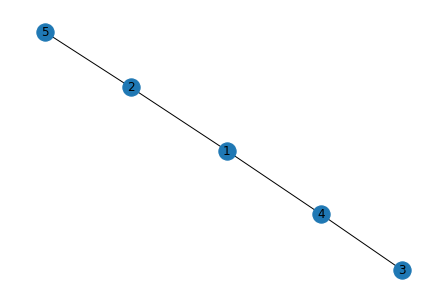

In [10]:
draw(st)

In [3]:
# generate_random_circuit(6, 20)
in_circ = parse_circ_qasm('rand.txt')
A_init = build_parity_mtx(in_circ)
print(A_init)

[[1 0 0 0 0 0]
 [0 0 0 1 0 1]
 [0 0 1 0 0 0]
 [0 1 0 1 0 1]
 [0 0 0 0 1 0]
 [0 1 0 0 0 1]]


In [8]:
A = A_init.copy()
Y1 = fix_upper(A, G.copy())

A = A.transpose()
print(A)
Y2 = fix_lower(A, G.copy())
Y = Y2 + Y1
# print(A)

finished upper 0
[[1 0 0 0 0 0]
 [0 0 0 1 0 1]
 [0 0 1 0 0 0]
 [0 1 0 1 0 1]
 [0 0 0 0 1 0]
 [0 1 0 0 0 1]]
fix diag 1
[[1 0 0 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 0 0]
 [0 1 0 1 0 1]
 [0 0 0 0 1 0]
 [0 1 0 0 0 1]]
T: [(5, 4), (4, 3)]
[(5, 4), (4, 3), (5, 4)]
T: [(5, 2)]
[(5, 2)]
T: [(1, 2), (1, 4), (2, 5), (5, 4), (4, 3)]
[(1, 2), (1, 4), (2, 5), (4, 3), (1, 2), (1, 4)]
finished upper 1
[[1 0 0 0 0 0]
 [0 1 0 1 0 0]
 [0 1 1 0 0 1]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 1 1 1 0 0]]
[[1 0 0 0 0 0]
 [0 1 0 1 0 0]
 [0 1 1 0 0 1]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 1 1 1 0 0]]
T: [(2, 5)]
[(2, 5)]
finished upper 2
[[1 0 0 0 0 0]
 [0 1 0 1 0 0]
 [0 1 1 0 0 1]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 1]]
fix diag 3
[[1 0 0 0 0 0]
 [0 1 0 1 0 0]
 [0 1 1 0 0 1]
 [0 1 0 1 0 1]
 [0 0 0 0 1 0]
 [0 0 0 1 0 1]]
T: [(3, 4), (4, 5)]
[(3, 4), (4, 5), (3, 4)]
finished upper 3
[[1 0 0 0 0 0]
 [0 1 0 1 0 0]
 [0 1 1 0 0 1]
 [0 1 0 1 0 1]
 [0 0 0 0 1 0]
 [0 1 0 0 1 0]]
[[1 0 0 0 0 0]
 [0 1 0 1 0 0]
 [0 1 1 0 0 1]
 [0

NetworkXError: The node 5 is not in the graph.

In [33]:
Ar = np.identity(len(A_init), dtype=int)
for ctrl, tar in Y:
    Ar[tar] = (Ar[tar] + Ar[ctrl])%2
(Ar-A_init).sum()

0